In [1]:
from PIL import Image
from skimage.io import imread, imshow, show
# import scipy.fftpack as fp
from scipy import ndimage, misc, signal, stats
# from scipy.stats import signaltonoise
# signaltonoise no longer available
# https://docs.scipy.org/doc/scipy/release.0.16.0.html?highlight=signaltonoise#deprecated-features
from skimage import data, img_as_float
from skimage.color import rgb2gray, rgba2rgb
from skimage.transform import rescale
import matplotlib.pylab as plt
import numpy as np
import numpy.fft as fp
import timeit

#3d
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
# from matplotlib.ticker import LinearLocator, FormatStrFormatte

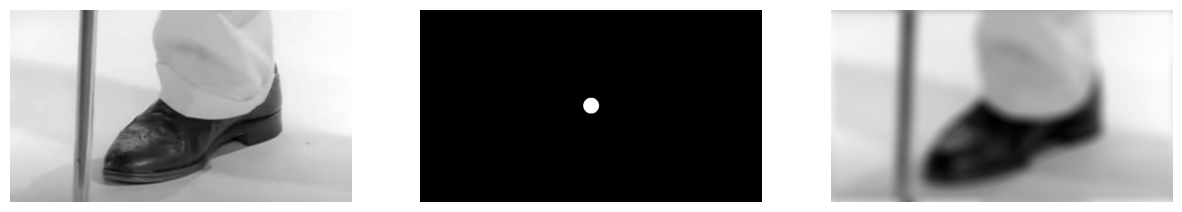

In [2]:
im = np.array(Image.open("../images/rrleg.png").convert("L"))
m,n = im.shape
imh = np.zeros(im.shape)
freq = fp.fft2(im)

d0 = 30**2
for i in range(m):
    for j in range(n):
        imh[i,j] = 1 if (((i-m/2)**2 + (j-n/2)**2) <= d0) else 0
# imh = np.ones(imh.shape) - imh

plt.figure(figsize=(15,6))
plt.subplot(132), plt.imshow(imh, cmap="gray"), plt.axis(False)
imh = fp.fft2(imh)
freq1 = freq * imh
im1 = fp.ifft2(freq1)
im1 = fp.ifftshift(im1).real

plt.subplot(131), plt.imshow(im, cmap="gray"), plt.axis(False)
# plt.subplot(122), plt.imshow(np.log10(0.01 + np.abs(fp.fftshift(freq))), cmap="gray"), plt.axis(False)
plt.subplot(133), plt.imshow(im1, cmap="gray"), plt.axis(False)

plt.show()

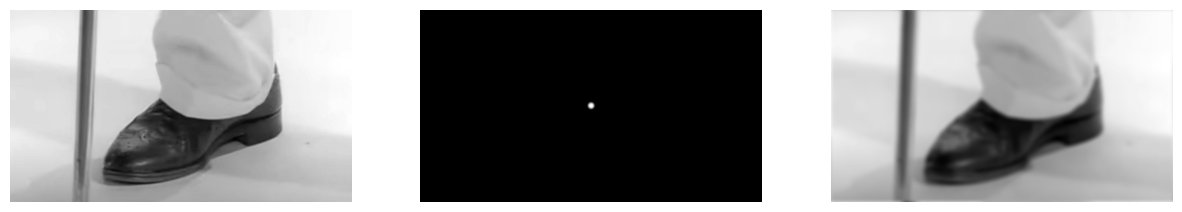

In [3]:
im = np.array(Image.open("../images/rrleg.png").convert("L"))
m,n = im.shape
imh = np.zeros(im.shape)
freq = fp.fft2(im)

d0 = 100
for i in range(m):
    for j in range(n):
        d1 = (i-m/2)**2 + (j-n/2)**2
        imh[i,j] = np.e ** (-d1**2/(2*d0**2))

plt.figure(figsize=(15,6))
plt.subplot(132), plt.imshow(imh, cmap="gray"), plt.axis(False)
rd = imh
imh = fp.fft2(imh)
freq1 = freq * imh
im1 = fp.ifft2(freq1)
im1 = fp.ifftshift(im1).real

plt.subplot(131), plt.imshow(im, cmap="gray"), plt.axis(False)
# plt.subplot(122), plt.imshow(np.log10(0.01 + np.abs(fp.fftshift(freq))), cmap="gray"), plt.axis(False)
plt.subplot(133), plt.imshow(im1, cmap="gray"), plt.axis(False)

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


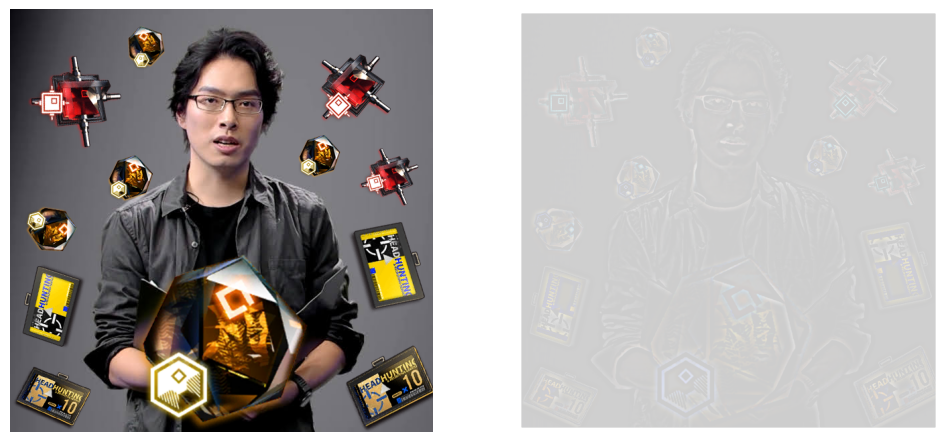

In [4]:
from skimage import img_as_float
im = img_as_float(plt.imread('../images/lowlight_with_power.png'))
plt.figure(figsize=(12,6)), plt.subplot(121), plt.imshow(im), plt.axis(False)
x = np.linspace(-10, 10, 15)
kernel_1d = np.exp(-0.005*x**2)
kernel_1d /= np.trapz(kernel_1d) # normalize the sum to 1
gauss_kernel1 = kernel_1d[:, np.newaxis] * kernel_1d[np.newaxis, :]
kernel_1d = np.exp(-5*x**2)
kernel_1d /= np.trapz(kernel_1d) # normalize the sum to 1
gauss_kernel2 = kernel_1d[:, np.newaxis] * kernel_1d[np.newaxis, :]
DoGKernel = gauss_kernel1[:, :, np.newaxis] - gauss_kernel2[:, :,np.newaxis]
im = signal.fftconvolve(im, DoGKernel, mode='same')
plt.subplot(122), plt.imshow(im), plt.imshow(np.clip(im,0,1)), plt.axis(False)
plt.show()


(182, 180)


C:\Users\fpt\AppData\Local\Temp\ipykernel_3812\2638837038.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.subplot(2,2,2), plt.imshow( (20*np.log10( 0.1 + F2)).astype(int),
C:\Users\fpt\AppData\Local\Temp\ipykernel_3812\2638837038.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.subplot(2,2,4), plt.imshow( (20*np.log10( 0.1 + F2)).astype(int),


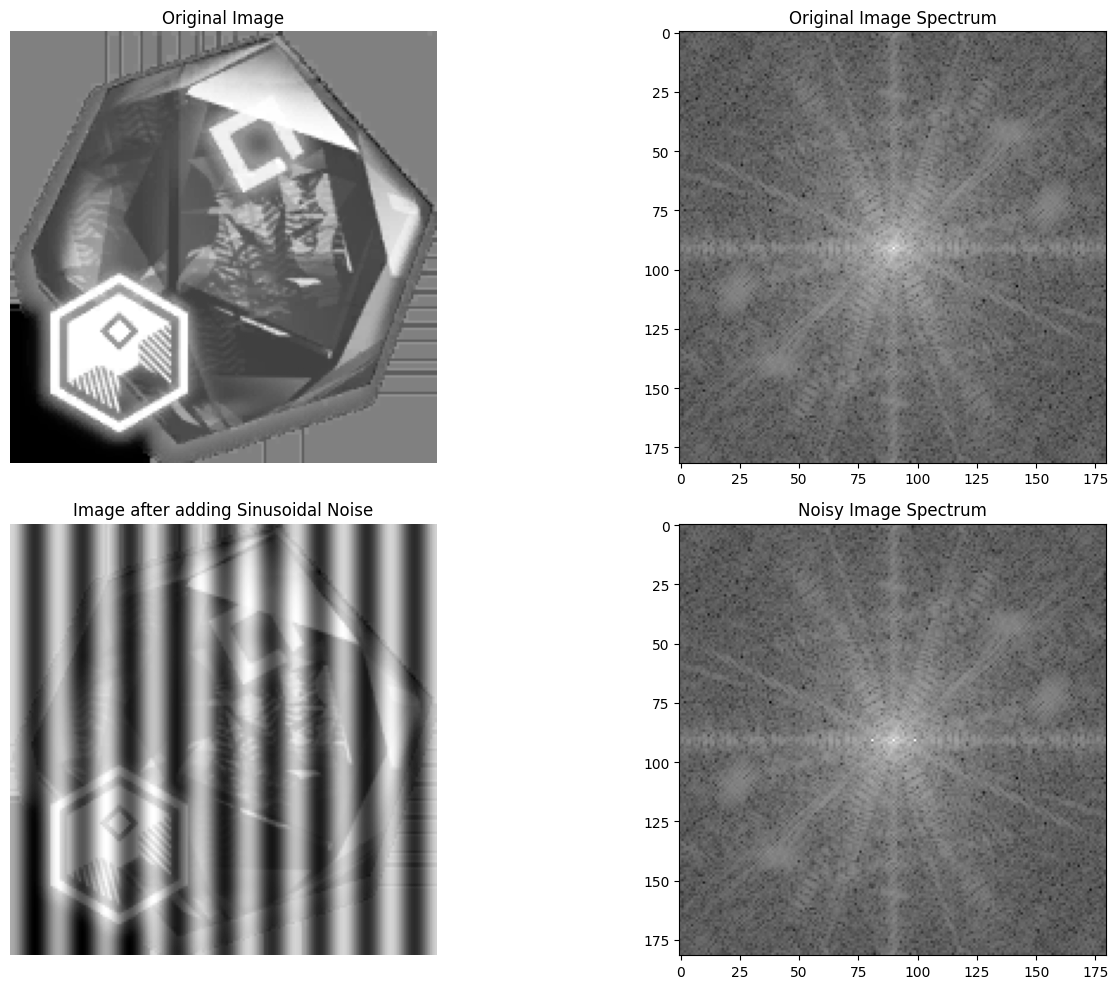

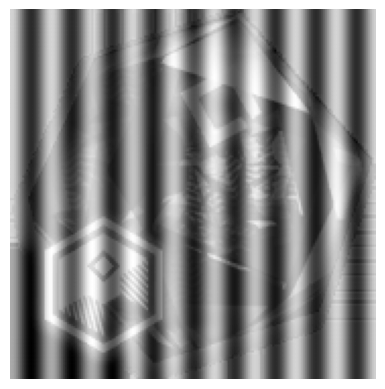

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x201836fb970>, None)

In [5]:
from scipy import fftpack
plt.figure(figsize=(15,10))
im = np.mean(imread("../images/Originite_Prime.png"), axis=2) / 255
print(im.shape)
plt.subplot(2,2,1), plt.imshow(im, cmap='gray'), plt.axis('off')
plt.title('Original Image')
F1 = fftpack.fft2((im).astype(float))
F2 = fftpack.fftshift( F1 )
plt.subplot(2,2,2), plt.imshow( (20*np.log10( 0.1 + F2)).astype(int),
cmap=plt.cm.gray)
plt.xticks(np.arange(0, im.shape[1], 25))
plt.yticks(np.arange(0, im.shape[0], 25))
plt.title('Original Image Spectrum')
# add periodic noise to the image
for n in range(im.shape[1]):
    im[:, n] += np.cos(0.1*np.pi*n)
plt.subplot(2,2,3), plt.imshow(im, cmap='gray'), plt.axis('off')
plt.title('Image after adding Sinusoidal Noise')
F1 = fftpack.fft2((im).astype(float)) # noisy spectrum
F2 = fftpack.fftshift( F1 )
plt.subplot(2,2,4), plt.imshow( (20*np.log10( 0.1 + F2)).astype(int),
cmap=plt.cm.gray)
plt.xticks(np.arange(0, im.shape[1], 25))
plt.yticks(np.arange(0, im.shape[0], 25))
plt.title('Noisy Image Spectrum')
plt.tight_layout()
plt.show()

F2[170:176,:220] = F2[170:176,230:] = 0 # eliminate the frequencies most likely responsible for noise (keep some low frequency components)
im1 = fftpack.ifft2(fftpack.ifftshift( F2 )).real
plt.axis('off'), plt.imshow(im1, cmap='gray'), plt.show()

251.5506 255.0


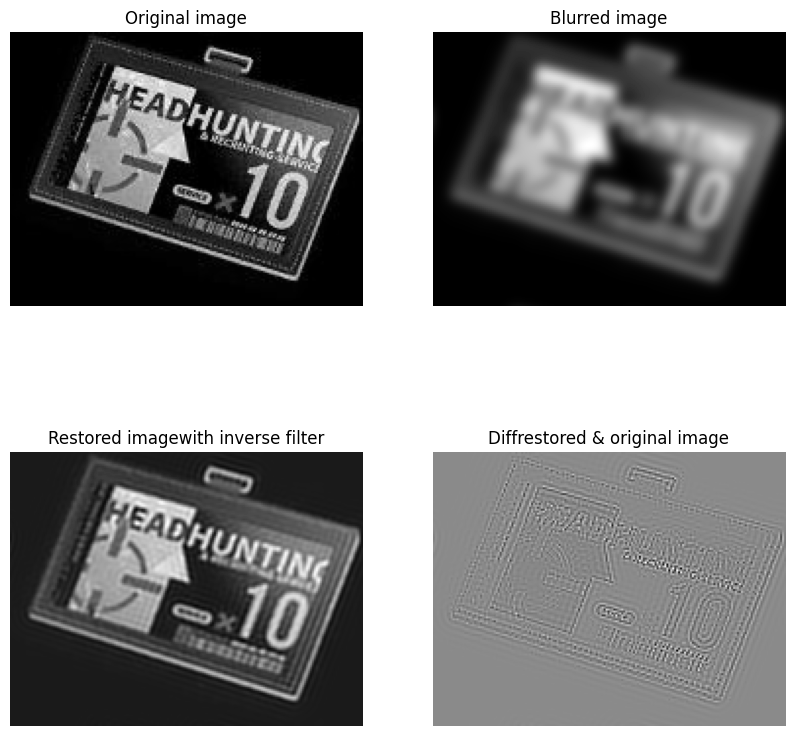

In [6]:
im = 255*rgb2gray(imread('../images/Headhunt10.jpg'))
gauss_kernel = np.outer(signal.gaussian(im.shape[0], 3), signal.gaussian(im.shape[1], 3))
freq = fp.fft2(im)
freq_kernel = fp.fft2(fp.ifftshift(gauss_kernel)) # this is our H
convolved = freq*freq_kernel # by convolution theorem
im_blur = fp.ifft2(convolved).real
im_blur = 255 * im_blur / np.max(im_blur) # normalize
epsilon = 10**-5
freq = fp.fft2(im_blur)
freq_kernel = 1 / (epsilon + freq_kernel) # avoid division by zero
convolved = freq*freq_kernel
im_restored = fp.ifft2(convolved).real
im_restored = 255 * im_restored / np.max(im_restored)
print(np.max(im), np.max(im_restored))
plt.figure(figsize=(10,10))

plt.gray()
plt.subplot(221), plt.imshow(im), plt.title('Original image'), plt.axis('off')
plt.subplot(222), plt.imshow(im_blur), plt.title('Blurred image'), plt.axis('off')
plt.subplot(223), plt.imshow(im_restored), plt.title('Restored imagewith inverse filter'), plt.axis('off')
plt.subplot(224), plt.imshow(im_restored - im), plt.title('Diffrestored & original image'), plt.axis('off')
plt.show()

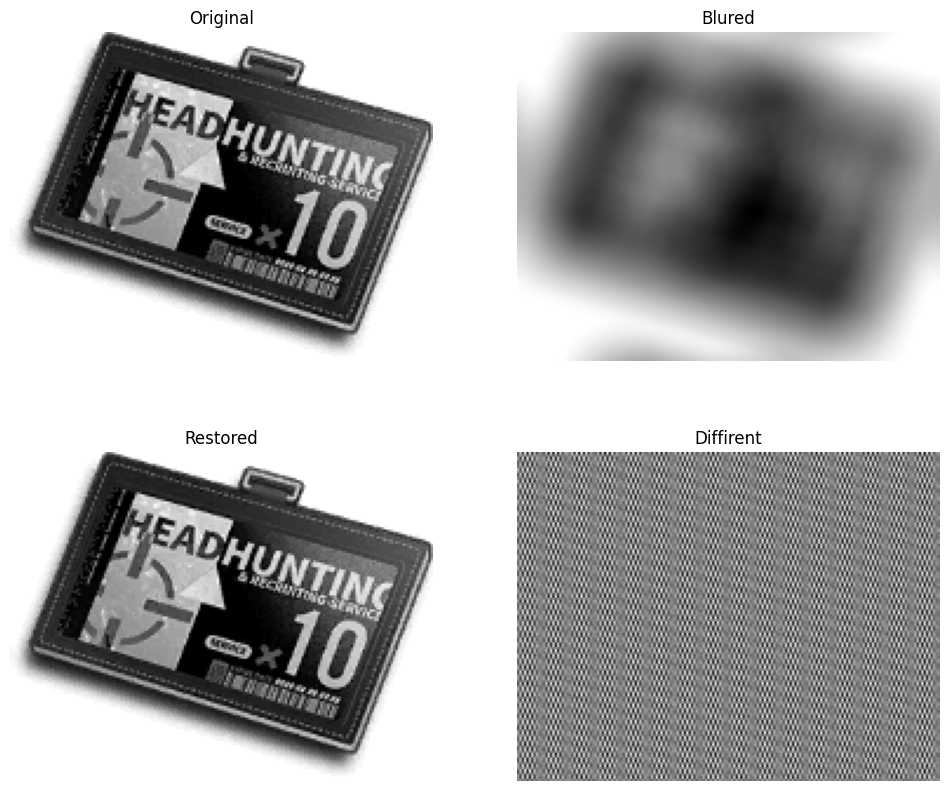

In [7]:
im = imread("../images/Headhunt10.png")
im = rgba2rgb(im) if im.shape[2] == 4 else im
scale = 1
im = scale * rgb2gray(im)
m,n = im.shape
H = np.zeros(im.shape)
freq = fp.fft2(im)

d0 = 20
sq_d0 = d0 ** 2
for i in range(m):
    for j in range(n):
        H[i,j] = 1 if (((i-m/2)**2 + (j-n/2)**2) <= sq_d0) else 0
        # d1 = (i-m/2)**2 + (j-n/2)**2
        # H[i,j] = np.e ** (-d1**2/(2*d0**2))

epsilon = 10**-6
kernel = fp.fft2(fp.ifftshift(H))
freq1 = freq * kernel
im1 = fp.ifft2(freq1).real

freq = fp.fft2(im1)
ikernel = 1/(kernel + epsilon)  
freq2 = freq * ikernel
im2 = fp.ifft2(freq2).real

plt.figure(figsize=(12,10))
plt.subplot(221), plt.imshow(im, cmap="gray"), plt.axis(False), plt.title("Original")
plt.subplot(222), plt.imshow(im1, cmap="gray"), plt.axis(False), plt.title("Blured")
plt.subplot(223), plt.imshow(im2, cmap="gray"), plt.axis(False), plt.title("Restored")
plt.subplot(224), plt.imshow(im-im2, cmap="gray"), plt.axis(False), plt.title("Diffirent")
plt.show()

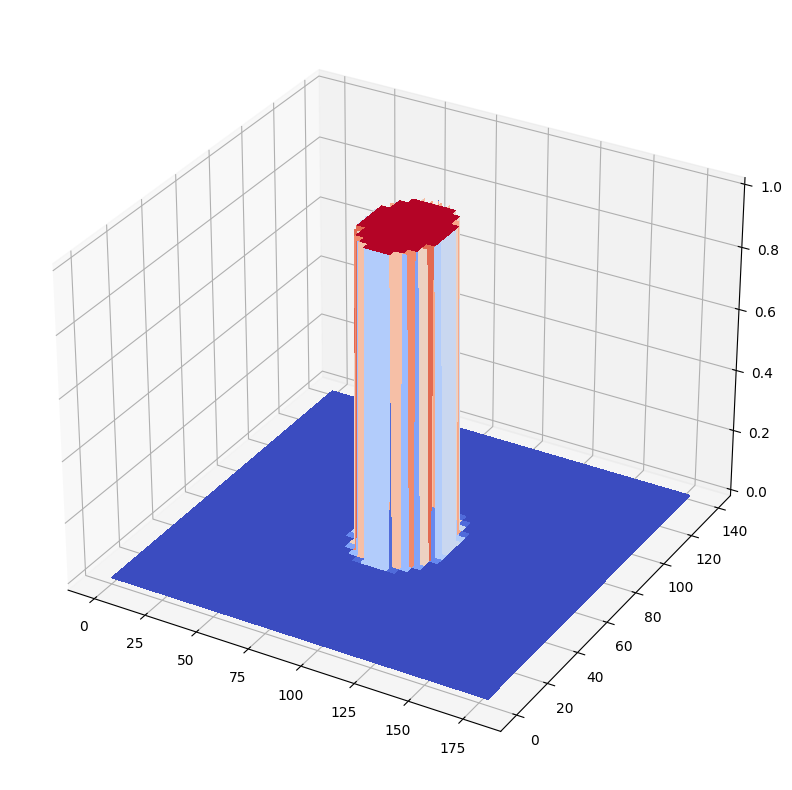

In [9]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Make data.
X = np.arange(0, H.shape[1], 1)
Y = np.arange(0, H.shape[0], 1)
X, Y = np.meshgrid(X, Y)

# X,Y,Z = -X,-Y,-Z
# Plot the surface.
surf = ax.plot_surface(X, Y, H, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()